In [55]:
"""
Aman Arya
CSE 415
1535134
A7: Part A
20newsgroups w/ Naive Bayes
"""
%matplotlib inline
import itertools
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [29]:
cats = ['rec.autos', 'sci.med']
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats)
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats)

In [59]:
print("%d documents" % len(train.data))
print("%d categories" % len(train.target_names))

1188 documents
2 categories


In [60]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(train.data)
tfidf_test = tfidf_vectorizer.transform(test.data)

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:    0.938
Confusion matrix, without normalization


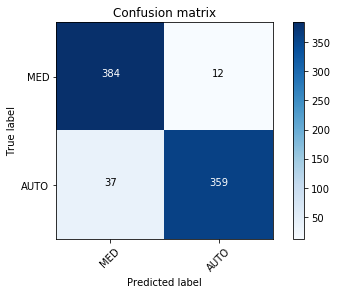

In [64]:
clf = MultinomialNB()
clf.fit(tfidf_train, train.target)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(test.target, pred)
print("accuracy:    %0.3f" % score)
cm = metrics.confusion_matrix(test.target, pred)
plot_confusion_matrix(cm, classes=['MED', 'AUTO'])